# Part II - Gender gap in upbringing of school children 
## based on PISA 2022 Database: *School students questionnaire conducated in more than 70 countries* by Madina Madeyeva

## Investigation Overview


> The goal of this report is to highlight on gender biases in upbringing of children, which are not only observed on average of >400 000 kids (in more than 73 countries).
> 
> Boys in the observed dataset dedicate more time on doing Sports, while girls on school homework.
>
> Work for pay has a similar trend of boys spending more time compared to girls on average for this activity.

## Dataset Overview

> The analysis is based on PISA 2022 Database, which represents questionnaire results of school children conducted in more than 70 countries. The data can be found and downloaded via the following website: https://www.oecd.org/en/data/datasets/pisa-2022-database.html

In [ ]:
# !pip install pandas openpyxl
# pip install plotly
# pip install matplotlib numpy

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pyreadstat
import plotly.express as px

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe (using processed and cleaned data from the original PISA 2022 database)
df2 = pd.read_csv('df_cleaned_1.csv')

## Visualization 1. Number of days per week spend on Sports per Gender

> Number of female school children, who do not participate in any Sports (after school) is 1.8 times higher than the number of male school children.
> 
> At the same time, number of boys, who spend 5 or more days on doing sports, is exactly 1.8 times higher than girls.

In [3]:
def create_clustered_bar_chart_count(df, category_col1, category_col2, title, xlabel, order_col2=None):
    """
    Create a clustered bar chart based on counts from two categorical columns.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col1 (str): The first categorical column name (x-axis).
    category_col2 (str): The second categorical column name (hue).
    order_col2 (list, optional): Custom order for the second categorical column.

    Returns:
    None
    """
    # Ensure the input DataFrame has the required columns
    if category_col1 not in df.columns or category_col2 not in df.columns:
        raise ValueError("DataFrame must contain the specified columns.")

    # Create a count DataFrame
    count_df = df.groupby([category_col1, category_col2]).size().reset_index(name='count')

    # Create a clustered bar chart
    plt.figure(figsize=(10, 6))
    bar_plot = sb.barplot(data=count_df, x=category_col1, y='count', hue=category_col2, hue_order=order_col2)
    
    # Annotate each bar with the count value
    for p in bar_plot.patches:
        bar_plot.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha='center', va='bottom', 
                          fontsize=10, color='black', 
                          xytext=(0, 5),  # 5 points vertical offset
                          textcoords='offset points')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count of observations')
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

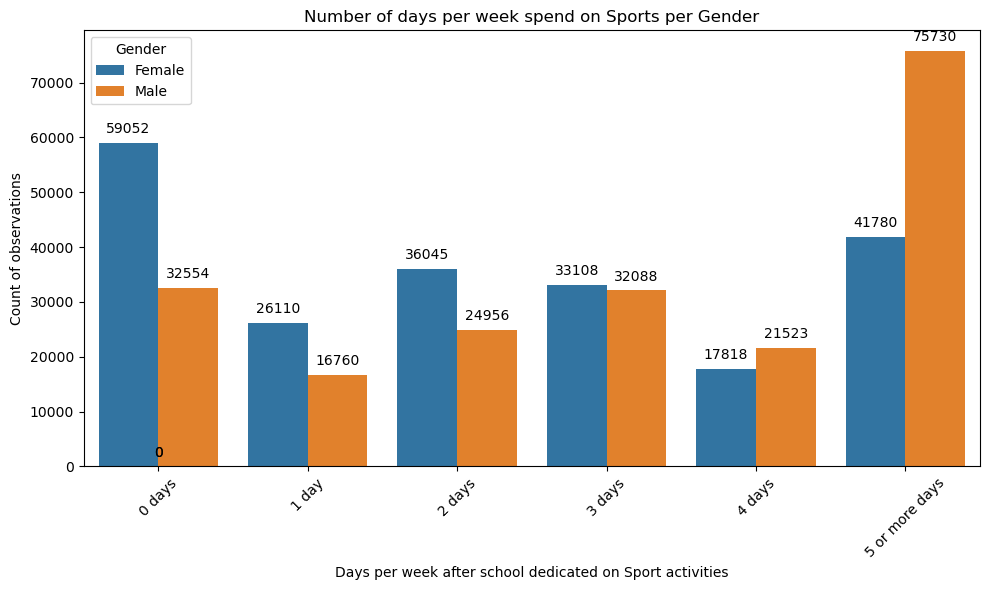

In [4]:
create_clustered_bar_chart_count(df2, 'How many days/wk after school: Exercise or practise a sport (e.g. running, cycling, aerobics, soccer, skating, [country-specific])',
                                 'Student (Standardized) Gender',
                                 title='Number of days per week spend on Sports per Gender',
                                xlabel='Days per week after school dedicated on Sport activities')

## Visualization 2. Number of days per week spend on Work for pay per Gender

> Boys spend more days per week on Work for pay activities in all the categories, number of girls is high only in the category of 0 days per week spend on Work for pay activities.

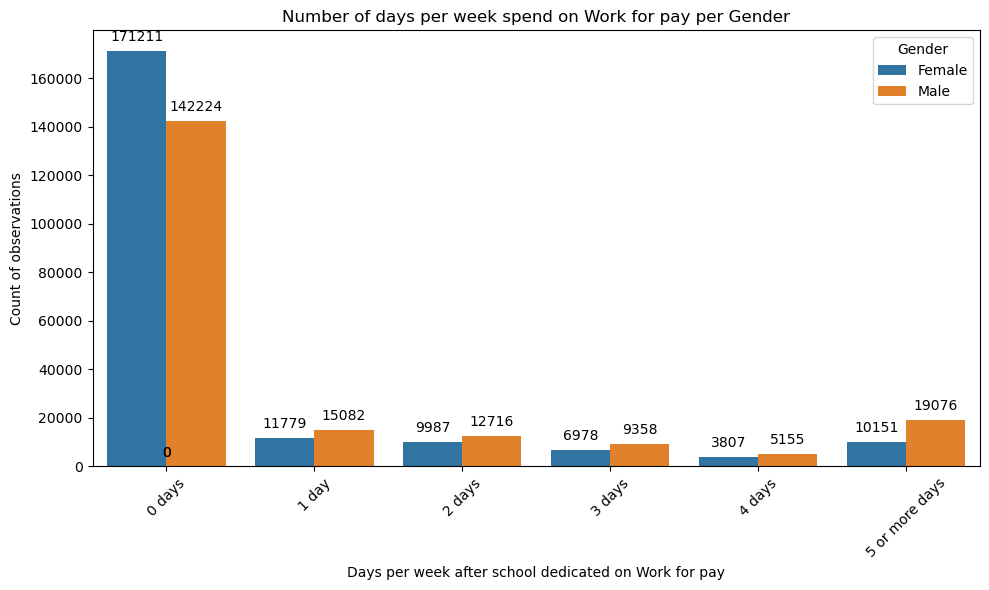

In [5]:
create_clustered_bar_chart_count(df2, 'How many days/wk after school: Work for pay',
                                 'Student (Standardized) Gender',
                                 title='Number of days per week spend on Work for pay per Gender',
                                xlabel='Days per week after school dedicated on Work for pay')

## Visualization 3. Number of days per week spend to perform school homework per Gender

> More proportion of boys spend less than 5 days to perform school homework than girls.

In [6]:
def create_violin_plot(df, category_col, value_col, ylabel, xlabel,title, filter_categories=None, custom_order=None, custom_order_values=None):
    """
    Create a violin plot based on a categorical column and a continuous variable, with optional filtering.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    category_col (str): The categorical column name (x-axis).
    value_col (str): The continuous variable column name (y-axis).
    filter_categories (list, optional): List of categories to include in the plot.
    custom_order (list, optional): Custom order for the categorical column.
    custom_order_values (list, optional): Custom order for the values on the y-axis.

    Returns:
    None
    """
    # Ensure the input DataFrame has the required columns
    if category_col not in df.columns or value_col not in df.columns:
        raise ValueError("DataFrame must contain the specified columns.")

    # Filter the DataFrame based on specified categories if provided
    if filter_categories is not None:
        df = df[df[category_col].isin(filter_categories)]

    # Create a violin plot with custom order if provided
    plt.figure(figsize=(10, 6))
    
    # If custom_order_values is provided, we need to set the y-axis to this order
    if custom_order_values is not None:
        df[value_col] = pd.Categorical(df[value_col], categories=custom_order_values, ordered=True)

    sb.violinplot(data=df, x=category_col, y=value_col, inner='quartile', palette='muted', order=custom_order)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

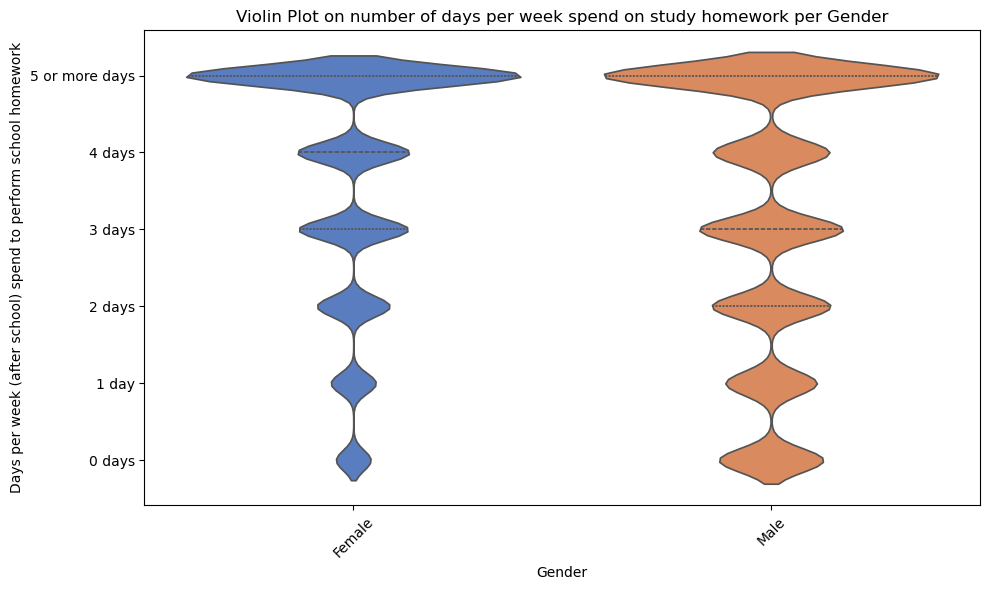

In [7]:
create_violin_plot(df2, 
                   category_col='Student (Standardized) Gender', 
                   value_col='How many days/wk after school: Study for school or homework', 
                   ylabel='Days per week (after school) spend to perform school homework', 
                   xlabel='Gender', 
                   title='Violin Plot on number of days per week spend on study homework per Gender', 
#                   filter_categories=['A', 'B'], 
#                   custom_order=['A', 'B'], 
                   custom_order_values=['5 or more days', '4 days', '3 days', '2 days','1 day','0 days'])

In [ ]:
!jupyter nbconvert "Part_II_slide_deck_PISA.ipynb" --to slides --post serve --no-input --no-prompt